In [13]:
from time import perf_counter
import numpy as np
import cv2
from skimage import exposure
import matplotlib.pyplot as plt
from typing import Any
import os
from glob import glob
from skimage import exposure,measure
from skimage.segmentation import clear_border
import skimage.io
from skimage.filters import threshold_otsu,threshold_triangle,threshold_li,threshold_mean,median
from scipy import ndimage as ndi
import scipy
from skimage.morphology import area_closing,binary_closing,binary_erosion,binary_dilation,binary_opening,\
     remove_small_objects,remove_small_holes,reconstruction,erosion,closing,dilation,opening,disk

from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.feature import peak_local_max
from skimage.transform import rotate
import tifffile as tiff
import subprocess

number of images= 27
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg009.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg009.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask009.tif


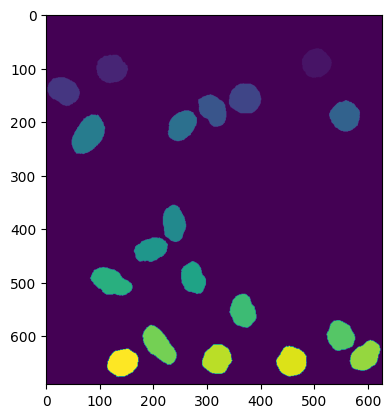

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg010.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg010.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask010.tif


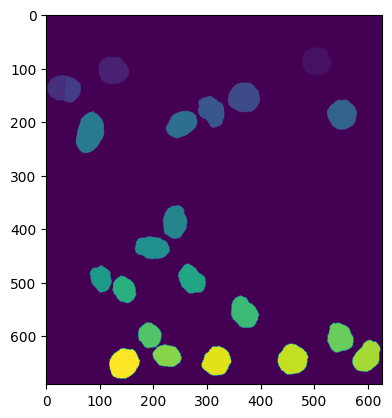

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg011.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg011.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask011.tif


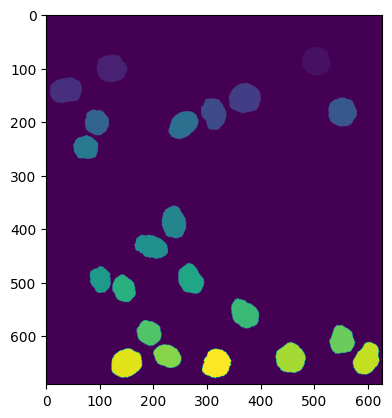

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg013.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg013.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask013.tif


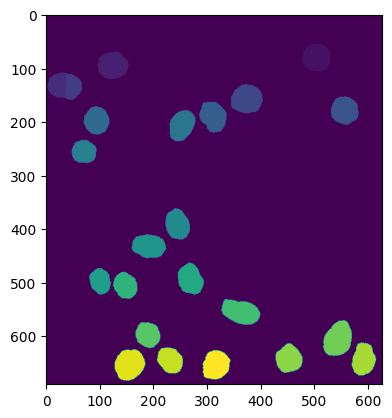

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg014.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg014.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask014.tif


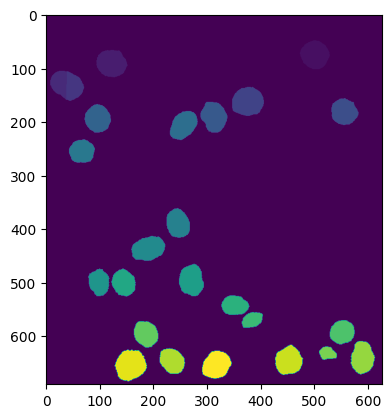

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg017.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg017.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask017.tif


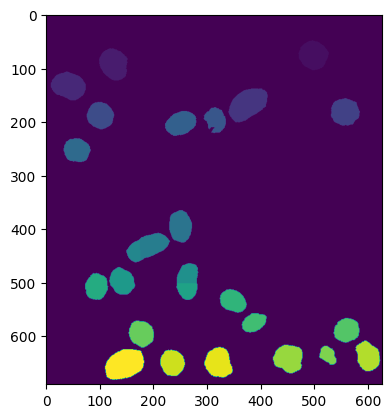

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg018.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg018.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask018.tif


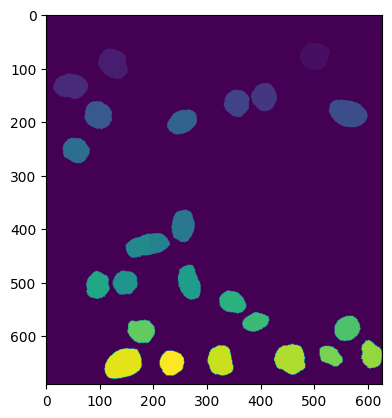

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg019.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg019.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask019.tif


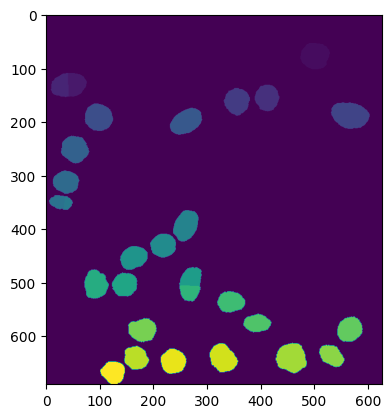

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg020.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg020.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask020.tif


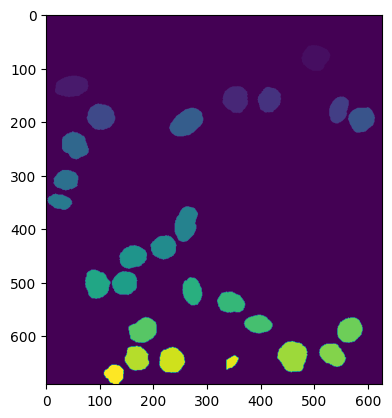

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg023.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg023.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask023.tif


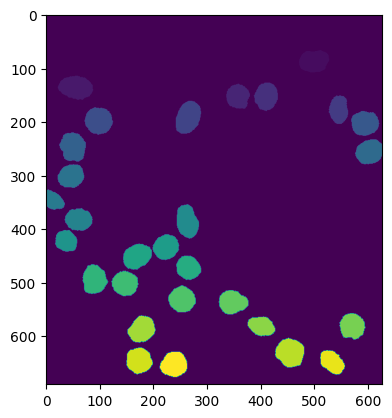

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg024.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg024.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask024.tif


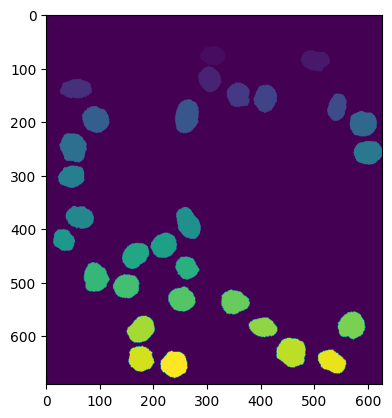

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg027.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg027.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask027.tif


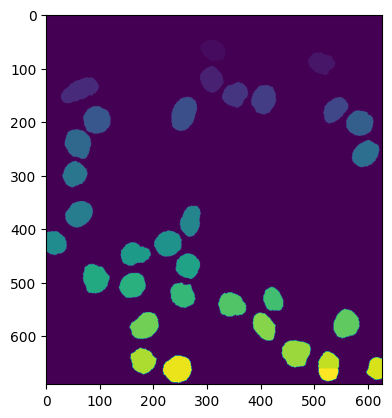

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg028.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg028.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask028.tif


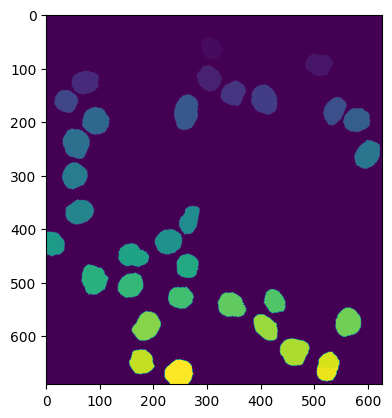

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg034.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg034.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask034.tif


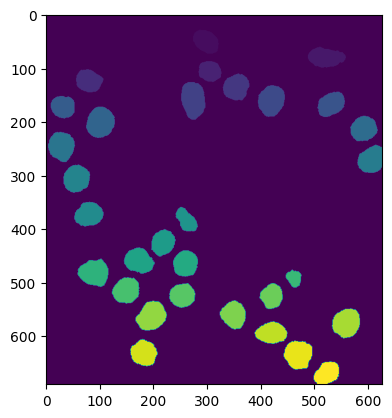

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg035.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg035.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask035.tif


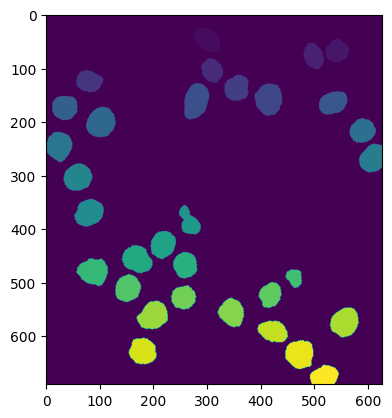

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg036.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg036.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask036.tif


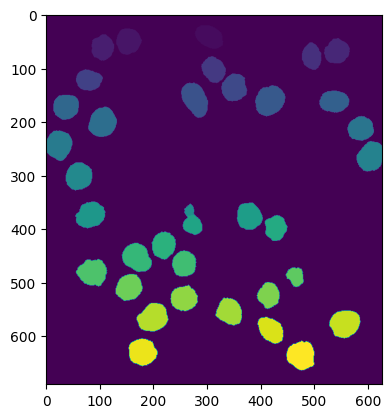

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg047.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg047.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask047.tif


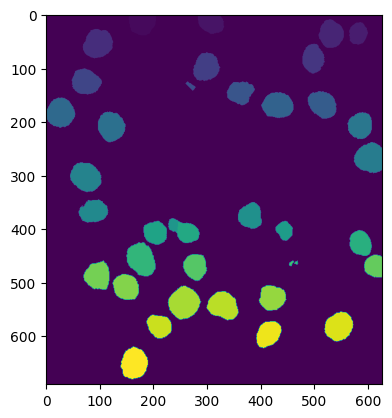

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg048.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg048.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask048.tif


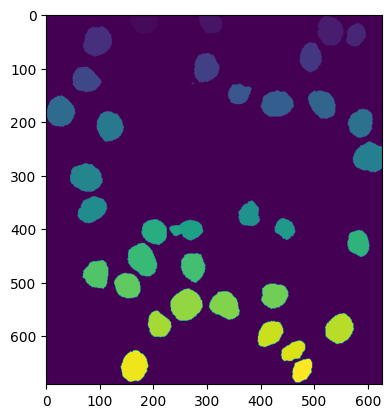

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg049.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg049.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask049.tif


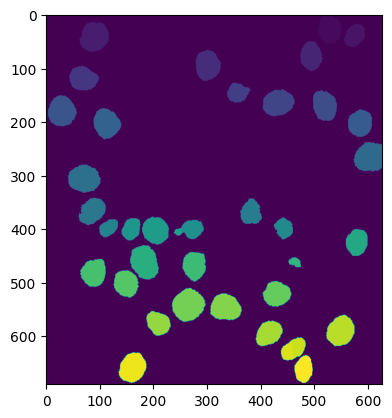

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg050.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg050.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask050.tif


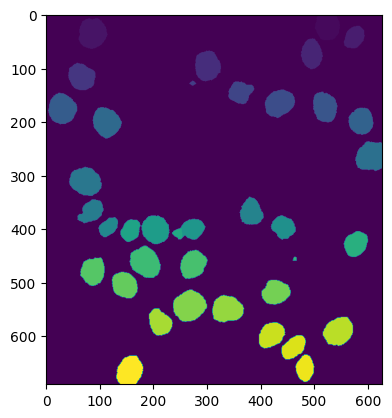

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg051.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg051.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask051.tif


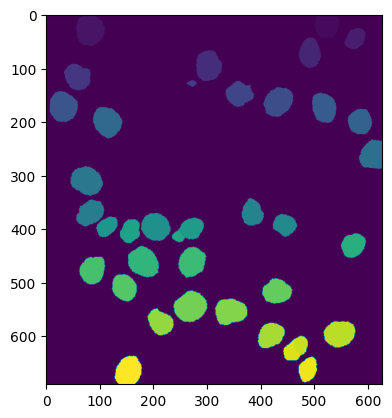

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg052.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg052.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask052.tif


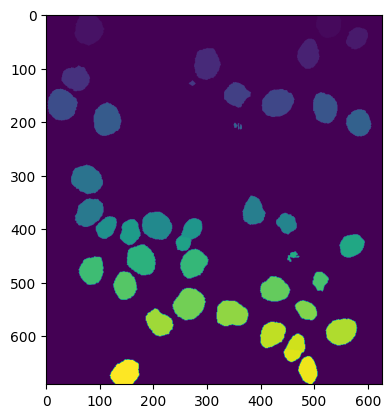

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg053.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg053.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask053.tif


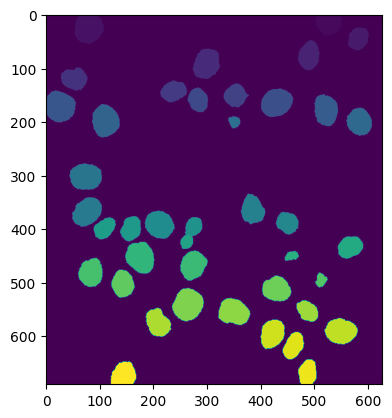

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg054.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg054.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask054.tif


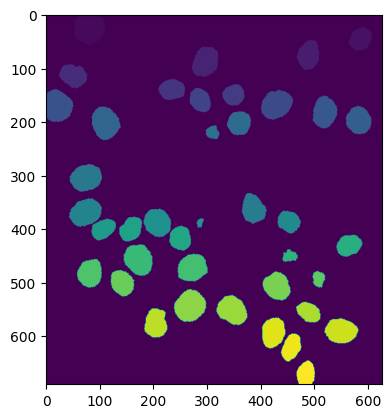

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg055.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg055.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask055.tif


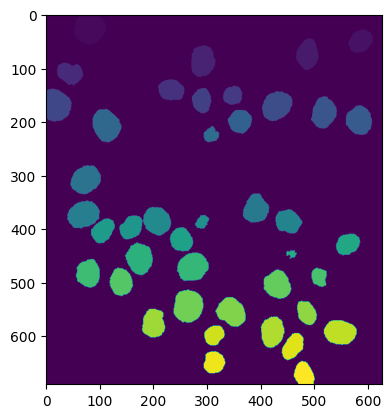

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg063.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg063.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask063.tif


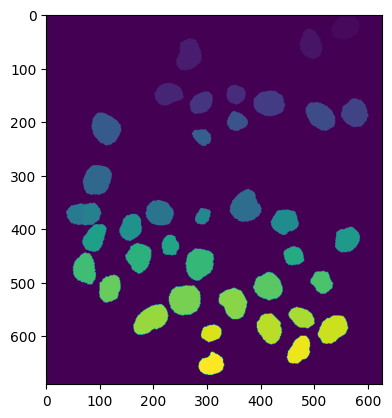

F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg064.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT\man_seg064.tif
F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask064.tif


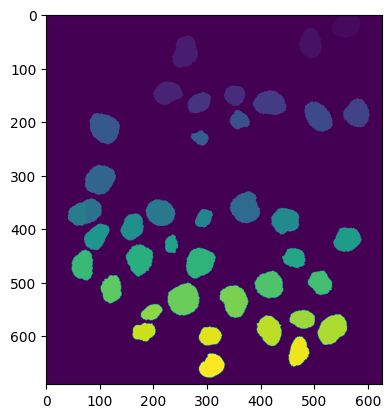

0.8661081088336952


In [11]:
dice_score=0

a='F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_gt/contain_mitosis/01_GT/'
mask_names1= glob(a + "*.*")

img_num=len(mask_names1)
print('number of images=',img_num)

for imgn in mask_names1:
    #if(imgn[0]==imgn[1]):
    #    continue;
    print(imgn)

    gt1= cv2.imread(imgn,cv2.IMREAD_ANYDEPTH)
    gt1=(gt1>0)*1
    
    imgnn=imgn.replace('01_gt/contain_mitosis\\man_seg','01/t')
    print(imgnn)

    image1=cv2.imread(imgnn,cv2.IMREAD_ANYDEPTH)
    image1=cv2.GaussianBlur(image1,(3,3),0)
    p2, p98 = np.percentile(image1, (0.2, 99.8),method='median_unbiased')
    image1 = skimage.exposure.rescale_intensity(image1, in_range=(p2, p98))
    image1 = (image1 - image1.min()) / (image1.max() - image1.min())
    image1 = skimage.exposure.equalize_adapthist(image1, clip_limit=0.01).astype(np.float32)# Adaptive Equalization    
    
    thresholds =threshold_otsu(image1)
    cells = image1 > thresholds
    cells=remove_small_holes(cells,256, connectivity=1)
    distance = ndi.distance_transform_edt(cells)
    local_max_coords = peak_local_max(distance, min_distance=7)
    local_max_mask = np.zeros(distance.shape, dtype=bool)
    local_max_mask[tuple(local_max_coords.T)] = True
    markers = measure.label(local_max_mask)
    segmented_cells = watershed(-distance, markers, mask=cells)
    preds = (segmented_cells > 0)*1
   
    intersection=(preds * gt1).sum()
    union=(preds + gt1).sum() 
    dice_score += (2 * intersection / union)
    dir1='F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/mask'+imgn[-7:]
    print(dir1)
    tiff.imsave(dir1, segmented_cells.astype(np.uint16), compress=1)
    #plt.imshow(image1)
    #plt.show()
    
    plt.imshow(segmented_cells)
    plt.show()

print('dice=',dice_score/img_num) 

In [16]:
dir2='F:/celltrackingdata/2D Data/Fluo-N2DH-SIM/01_GT/contain_mitosis/'

result = subprocess.run(
    ["f:/infer/win/SEGMeasure.exe", dir2,'01', "3"], capture_output=True, text=True )
print("stdout:", result.stdout)

stdout: SEG measure: 0.738815

